# Intro 3: Multiple qubits and dynamics

Material adapted from https://github.com/amcdawes/QMlabs. I also recommend https://github.com/jrjohansson/scientific-python-lectures for a much more general approach to Python


In [2]:
#from numpy import sqrt,pi,cos,sin,arange,random,real,imag, dot, linspace

from numpy import linspace
from qutip import *


C:\Users\pc\ANa\Lib\site-packages\qutip\__init__.py:66: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


## 1. Composed systems: Hilbert spaces and operators

We know that the state of a system composed of two subsystems belongs to the Hilbert space obtained as the tensor product of the two Hilbert spaces which contain the states of the factors
$$
\psi\in \mathcal{H}=\mathcal{H}_1\otimes \mathcal{H}_2
$$
Hence, the state of a pair of qubits must belong to the Hilbert space $\mathbb{C}^4=\mathbb{C}^2\otimes \mathbb{C}^2$. 

Qubit includes the command tensor(object1, object2) to obtain the tensor product of any Qobjects. This can be used for states or for operators

In [3]:
ψc=3*tensor(basis(2,0), basis(2,1))+5*tensor(basis(2,0), basis(2,1))+2*tensor(basis(2,1), basis(2,0))
##tensor: calcula el procducto tensorial de objetos cuanticos. 
##3*|0>|1>+5*|0>|1>+2*|1>|0> => Producto tensorial de las basos (1,0) y (0,1).

In [4]:
ψc

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [8.]
 [2.]
 [0.]]

In [5]:
σxx=tensor(sigmax(), sigmax()) 
##Devolver ael producto tensorial de las matrices en la base anterior.

In [6]:
σxx

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

An important property of the set of self-adjoint operators is the following. We saw already that the set of Pauli matrices together with the identity matrix is 2 dimensions represent a basis for $\mathrm{Herm}(\mathbb{C}^2)$. It can also be proved that the tensor product of those elements also define a basis for $\mathrm{Herm}(\mathbb{C}^{2^k})$ for any $k∈ \mathbb{N}$.

Hence, for a pair of qubits, a basis for $\mathrm{Herm}(\mathbb{C}^4)$ (16-dimensional) can be defined as
$$
\{  \hat \sigma_j⊗ \hat \sigma_k\}, \qquad j,k=0,1,2,3
$$

In [7]:
BasisC2=[qeye(2), sigmax(), sigmay(), sigmaz()] ##Matrices de pauli e identidad forman una base.

In [8]:
BasisC4=[tensor(j,k) for j in BasisC2 for k in BasisC2] ##Forma una base del espacio de dos qbits, cada elemento es sigma_j por sigma_k

In [9]:
BasisC4

[Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
 Qobj data =
 [[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
 Qobj data =
 [[0. 1. 0. 0.]
  [1. 0. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
 Qobj data =
 [[0.+0.j 0.-1.j 0.+0.j 0.+0.j]
  [0.+1.j 0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j 0.-1.j]
  [0.+0.j 0.+0.j 0.+1.j 0.+0.j]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
 Qobj data =
 [[ 1.  0.  0.  0.]
  [ 0. -1.  0.  0.]
  [ 0.  0.  1.  0.]
  [ 0.  0.  0. -1.]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
 Qobj data =
 [[0. 0. 1. 0.]
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]
  [0. 1. 0. 0.]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
 Qobj data =
 [

Notice that for this basis to be orthonormal with respect to the Hilbert-Schmidt scalar product, we need to scale it as:
$$
\mathrm{BasisC4}=\left \{\frac 1 4 \hat \sigma_j\otimes \hat \sigma_k \right \}, \qquad j,k=0,1,2,3
$$



In [10]:
def scalarprod(A, B): 
    result=(A.dag()*B).tr()
    return result 

Now we verify that the basis is orthogonal but not orthonormal:

In [11]:
Λ=Qobj([[scalarprod(BasisC4[j], BasisC4[k]) for j in range(len(BasisC4))] for k in range(len(BasisC4))]) 
Λ ## Λ = <e_j|e_i>, es el producto escalar de los elementos de la base; se calcula con la anterior funcion. len(BasisC4)=16.

Quantum object: dims = [[16], [16]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]

## Composed systems: projective spaces

We can adapt the construction we saw for qubits to these more general cases:
$$
\hat \rho_\psi=\frac{|\psi\rangle \langle \psi|}{\langle \psi|\psi \rangle}
$$
These states can be seen as a linear combination of the elements of the basis, the coordinates being the projections on the basis elements $\hat \rho_j$
$$
\rho_\psi^j=\langle \hat \rho_j|\hat \rho_\psi \rangle=\mathrm{Tr}(\hat \rho_j \hat \rho_\psi)
$$

In [12]:
ρψ=ψc.unit()*(ψc.unit()).dag() 

In [13]:
ρψ

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.         0.         0.         0.        ]
 [0.         0.94117647 0.23529412 0.        ]
 [0.         0.23529412 0.05882353 0.        ]
 [0.         0.         0.         0.        ]]

In [14]:
ρψcoord=[scalarprod(j,ρψ)/scalarprod(j,j) for j in BasisC4]

In [15]:
ρψcoord

[0.25,
 0.0,
 0.0,
 -0.22058823529411764,
 0.0,
 0.11764705882352941,
 0.0,
 0.0,
 0.0,
 0.0,
 0.11764705882352941,
 0.0,
 0.22058823529411764,
 0.0,
 0.0,
 -0.25]

We can verify that these coordinates reconstruct the original $\rho_\psi$.

len(BasisC4) returns the length of the object BasisC4, which in this case is equal to 16.

In [16]:
sum([BasisC4[j]*ρψcoord[j] for j in range(len(BasisC4))])

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.         0.         0.         0.        ]
 [0.         0.94117647 0.23529412 0.        ]
 [0.         0.23529412 0.05882353 0.        ]
 [0.         0.         0.         0.        ]]

These projectors can also be obtained as the tensor product of the projectors of each factor, i.e.
$$
|\psi\rangle=|\psi_1\rangle\otimes |\psi_2\rangle \Rightarrow \rho_\psi=\rho_{\psi_1}\otimes \rho_{\psi_2}
$$

In [17]:
ψ_1=(3*basis(2,0)-5*basis(2,1)).unit() ##Estados de dos qbits
ψ_2=((1-2j)*basis(2,0)-6j*basis(2,1)).unit()
ψ=tensor(ψ_1, ψ_2) #Estado compuesto

In [18]:
ρψ_1=ψ_1*ψ_1.dag() #Proyector al primero
ρψ_2=ψ_2*ψ_2.dag() #Proyector al segundo
ρψ=ψ*ψ.dag() #Proyector a ambos, calculado por la composicion de los dos estados

In [19]:
ρψ

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.03228121+0.j          0.07747489+0.03873745j -0.05380201+0.j
  -0.12912482-0.06456241j]
 [ 0.07747489-0.03873745j  0.23242468+0.j         -0.12912482+0.06456241j
  -0.38737446+0.j        ]
 [-0.05380201+0.j         -0.12912482-0.06456241j  0.08967001+0.j
   0.21520803+0.10760402j]
 [-0.12912482+0.06456241j -0.38737446+0.j          0.21520803-0.10760402j
   0.6456241 +0.j        ]]

In [20]:
ρψ==tensor(ρψ_1, ρψ_2) #Se comprueba que es lo mismo que la composicion de los dos proyectores 

False

## 2.- Unitary dynamics

### Qubit under a magnetic field: Hilbert space description
For elements in the Hilbert space, dynamics is defined by the Schrödinger equation
$$
iℏ \frac {d}{dt}|\psi\rangle=\hat{H} |\psi \rangle
$$

We can consider the simplest case of a spin coupled to a magnetic field $\hat H= B_x\sigma_x+B_y\sigma_y+B_z\sigma_z$
$$
\hat H=\begin{pmatrix} B_z & B_x-iB_y \\ B_x+iB_y & -Bz\end{pmatrix}
$$

The evolution from the initial state at $t=t_0$ to the state at time t, is defined by a unitary operator, which in the case of time-independent Hamiltonians is written as
$$
U(t,t_0)=e^{-\frac i ℏ (t-t_0)\hat H}\;\; ; \qquad |\psi(t)\rangle =U(t,t_0)|\psi(t_0)\rangle
$$
The exponential of the Hamiltonian operator can be computed by the (numpy) expm function.  In the following, we will consider $t_0=0$.

In [22]:
# We define the components of the magnetic field and the Hamiltonian H=B*sigma, como se puede implementar lo de arriba en qtip
Bx=-1  
By=2
Bz=3
H=Bx*sigmax()+By*sigmay()+Bz*sigmaz() #Producto escalar

In [23]:
# We define the list of time values where we will evaluate the evolution
tlist=linspace(0,10, 100) #entre 0 y 10, 100 ptos

# We define the initial state 
ψ=(3*basis(2,0)-5*basis(2,1)).unit() ##Condicion inicial

In [24]:
# This function reproduces the action of the evolution operator on state 'state' at the times of 'tlist'
def traj(state, tlist):#Contruye una trayectoria. Pasa la conidicon inicial y el array de tiempos
    result=[((-1j*t*H).expm())*state for t in tlist] #Se mete el estado y el array de tiempos. Para cada t genera los elementos de un arary en el que va la exponencial(-i*t*h) actuando sobre el estado
    return result #Lista de estados cuánticos (trayectoria), es la fórmula del inicio

In [25]:
# This defines the trajectory on the Hilbert space H
ψt=traj(ψ, tlist #Obtenemos un array de posiciones, CUrba en el espacio de HIlberte

### Qubit under a magnetic field: projective space description
If we represent the state of the system by the projector
$$
\rho_\psi=\frac{|\psi\rangle \langle \psi|}{\langle \psi|\psi \rangle}
$$
we can also write the dynamics of the system in terms of the projectors. Indeed, consider the trajectory we obtained above and define the corresponding t-indexed family of projectors:

$$
\rho_\psi(t)=\frac{|\psi(t)\rangle \langle \psi(t)|}{\langle \psi(t)|\psi(t) \rangle}
$$

As the evolution is unitary, the norm of the state does not change, i.e.
$$
\langle \psi(t)|\psi(t) \rangle=\langle \psi(0)|\psi(0) \rangle, \qquad ∀ t
$$

That means that if we want to compute the derivative with respect to t of $\rho_\psi(t)$, we can write:
$$
iℏ \frac {d}{dt} \rho_\psi(t)= i\hbar \left(\frac{\left ( \frac{d}{dt} |\psi\rangle(t)\rangle \right ) \langle \psi(t)|}{\langle \psi(t)|\psi(t) \rangle}+
\frac{|\psi(t)\rangle \frac {d}{dt}\langle \psi(t)|}{\langle \psi(t)|\psi(t) \rangle}\right )= \hat H \frac{|\psi(t)\rangle \langle \psi(t)|}{\langle \psi(t)|\psi(t) \rangle} - \frac{|\psi(t)\rangle \langle \psi(t)|}{\langle \psi(t)|\psi(t) \rangle}\hat H=[\hat H, \rho_\psi(t)]
$$
This last equation
$$
iℏ \frac {d}{dt} \rho_\psi(t)=[\hat H, \rho_\psi(t)]
$$
is known as **von Neumann equation**, and is the equation which translates Schrödinger equation to the space of one-dimensional projectors.


The evolution from the initial state at $t=0$ to the state at time t, is defined again by a unitary operator, which in the case of time-independent Hamiltonians is written as
$$
U(t,0)=e^{-\frac i ℏ t\hat H}; \qquad \rho_\psi(t)=U(t,0)\rho_\psi(0)U^\dagger(t,0)=e^{-\frac i ℏ t\hat H}\,\rho_\psi \, e^{\frac i ℏ t\hat H}
$$
Indeed, if we derivate this last expression with respect to $t$, we obtain von Neumann equation.

Fórmula del proyector(segunda):
La norma se conserva, va a ser la misma en cualquier t que la de to=>Nos olvidamos del denominador
Se tiene que calcular la derivada de lo de arriba.

El ket y bra se escribe como la coordenada por la base y se llega a una expresion con sumatorios, que cada uno tiene el estado_conj*estado*proyeccion a la base. (Hay que hallar la derivada de eso).
Al hacer la derivada temporal de (|ψ><ψ|) se llega a H|ψ><ψ|-|ψ><ψ|H, signo menos por que se pasa a bra.

Se llega a la ecuacion de von Neumann, mas general que la de shrodinger. Solucion de esta ecuacion los de abajo.
ψ(t)=U(t)|ψ(o)>. Al dualizar eso se llega a la expresion de abajo.

In [26]:
# We define the projectors corresponding to the trajectory ψt: 
# Hallar los proyectores a cada punto de la trayectotria, ver si se puede calcular sin usar la de arriba
ρψt=[j*j.dag() for j in ψt]

In [27]:
ρψt[0] 

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.26470588 -0.44117647]
 [-0.44117647  0.73529412]]

In [28]:
ρψt[10]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.61697273+0.j         -0.23522561+0.42542484j]
 [-0.23522561-0.42542484j  0.38302727+0.j        ]]

Analogously, we can obtain the solution of the von Neumann equation

In [29]:
ρ0=ρψt[0]
ρt=[((-1j*k*H).expm())*ρ0*((1j*k*H).expm()) for k in tlist] #Se construye la trayectoria sobre los proyectores UpU+ (U+ es el autoadjunto)

These trajectories can be represented on the Bloch sphere, but first we must translate the projectors into coordinates. Furthermore, we must re-arrange the points to plot them on the sphere (this is a technical convention for the plotting library of qutip)

In [30]:
def rho2bloch(ρ):
    sxM=ρ*sigmax()
    sx=sxM.tr()
    syM=ρ*sigmay()
    sy=syM.tr()
    szM=ρ*sigmaz()
    sz=szM.tr()
    return [sx, sy, sz]

In [31]:
def vectors2points(list):
    listx=[j[0] for j in list]
    listy=[j[1] for j in list]
    listz=[j[2] for j in list]
    return [listx, listy, listz]

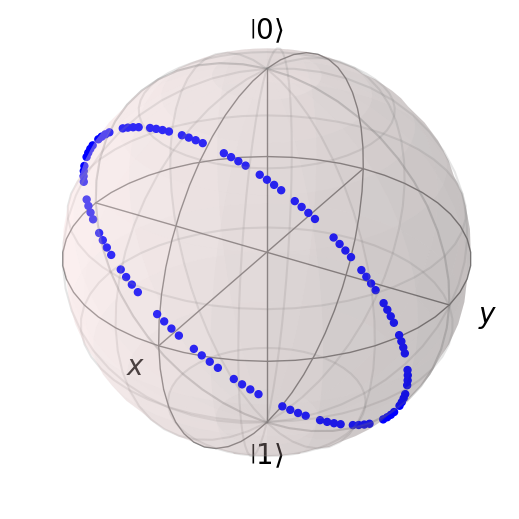

In [32]:
# Representation of the Bloch sphere
b=Bloch()


# We can also add points on the sphere


b.add_points(vectors2points(([rho2bloch(j) for j in ρψt])))
#b.add_points(vectors2points(([rho2bloch(j) for j in ρt])))

# Show plot
b.show() #Trayectoria de los proyectores

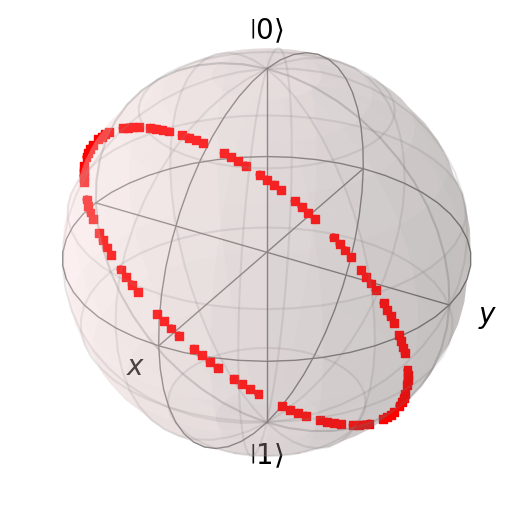

In [33]:
# Representation of the Bloch sphere
b=Bloch()


# We can also add points on the sphere

b.point_color='r'
b.add_points(vectors2points(([rho2bloch(j) for j in ρψt])))
b.add_points(vectors2points(([rho2bloch(j) for j in ρt])))

# Show plot
b.show() #Se muestra la solución a la ecuacion de vonNeumann

# Exercises

1.- Repeat the construction of point 1 above for the states above replacing the qubits by qutrits (three level systems), whose operators are generated by the identity and the Gell-Mann matrices (google these)

2.- Repeat the construction of point 2 using the Ising Hamiltonian for a pair of qubits
$$
\hat H=\sigma_3\otimes \sigma_3
$$

In [34]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.7.5
Numpy,1.24.3
SciPy,1.11.1
matplotlib,3.7.2
Cython,3.0.8
Number of CPUs,4
BLAS Info,INTEL MKL
IPython,8.15.0
Python,"3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]"
OS,nt [win32]
